In [2]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from cycler import cycler  # 添加这行引入


class StepsGraph:
    from typing import Optional, List
    def __init__(self, data=None, legend_txt=None, labels=None):
        self.data = data
        self.legend_txt = legend_txt
        self.labels = labels
    
    def plot_line_dot(
        self,
        ax: plt.Axes,
        color: Optional[str] = None,
        path_label: str = None,
        energy_label: bool = False, energy_label_fontsize=18,
        step_label: List[str] = None, step_label_fontsize=12,
        # image_label: List[str] = None
    ):
        """绘制虚实折线图"""
        y = copy.deepcopy(self.data)
        y_max, y_min = np.max(y), np.min(y)  # 获取y值的最大值和最小值
        y_bias = (y_max - y_min) / 25  # 获取文本标签y方向偏移量
        x = range(len(y))
        if path_label is None:
            path_label = self.legend_txt
        if step_label is None:
            step_label = self.labels
        # if image_label is None:
        #     image_label = self.images
        # for i in range(len(y)):  # 遍历所有列的能量值
        y_new = []
        x_new = []
        # 1.生成新的XY坐标点，个数加倍
        for j in range(len(y)):
            y_new.append(y[j])
            y_new.append(y[j])
            x_new.append(2*j)
            x_new.append(2*j+1)
        # 2.绘制虚线折线图
        if color is None:
            color = next(ax._get_lines.prop_cycler)['color']
            # print("now color is: ", color)
        ax.plot(x_new, y_new, linestyle='--', linewidth=2, color=color,
                # label=path_label
                )
        
        # 3.绘制实线折线图
        k = 0
        while k < len(y_new):
            x_line = [x_new[k], x_new[k+1]]
            y_line = [y_new[k], y_new[k+1]]
            ax.plot(x_line, y_line, linestyle='-', linewidth=4, color=color, label=path_label if k == 0 else None)
            k += 2
        
        
        # 4.标记能量值，偏移量视具体情况而定
        if energy_label:
            for j in range(len(x)):
                # plt.text(x[j] * 2 - 0.9, y[i][j] + y_bias, "{:.2f}".format(y[i][j]), fontsize=FontSize, color=color[i])    
                ax.text(x[j] * 2 + 0.5 , y[j] + y_bias, "{:.2f}".format(y[j]), fontsize=energy_label_fontsize, color=color, horizontalalignment='center')    
                # ax.text((x[2*j] + x[2*j + 1]) / 2, y[j] + y_bias, "{:.2f}".format(y[j]), fontsize=FontSize, color=color)

        now_minx, now_maxx = ax.get_xlim()
        now_miny, now_maxy = ax.get_ylim()
        if step_label:
            for j in range(len(x)):
                # ax.text(x[j] * 2 + 0.5, y_min - y_bias, step_label[j], fontsize=step_label_fontsize, color=color, horizontalalignment='center', verticalalignment='top')
                ax.text(
                    (x[j] * 2 + 0.5 - now_minx) / (now_maxx - now_minx),
                    0,
                    step_label[j],
                    fontsize=step_label_fontsize,
                    color=color,
                    horizontalalignment='center',
                    verticalalignment='top',
                    transform=ax.transAxes
                )
        ax.set_xticks([])
        ax.set_xticklabels([])

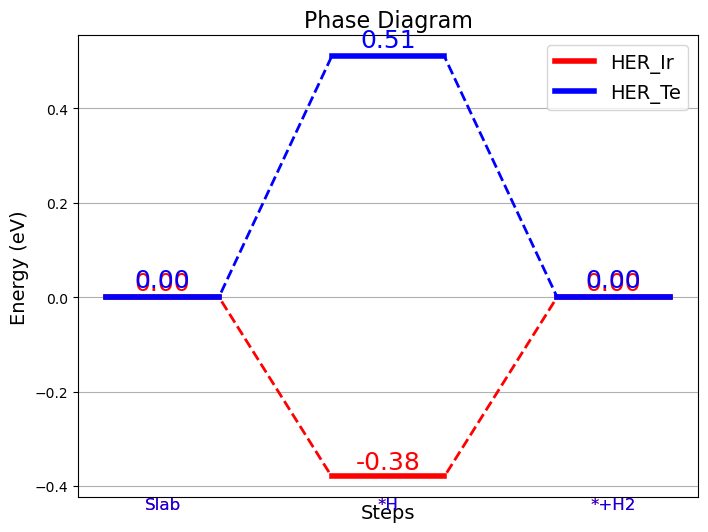

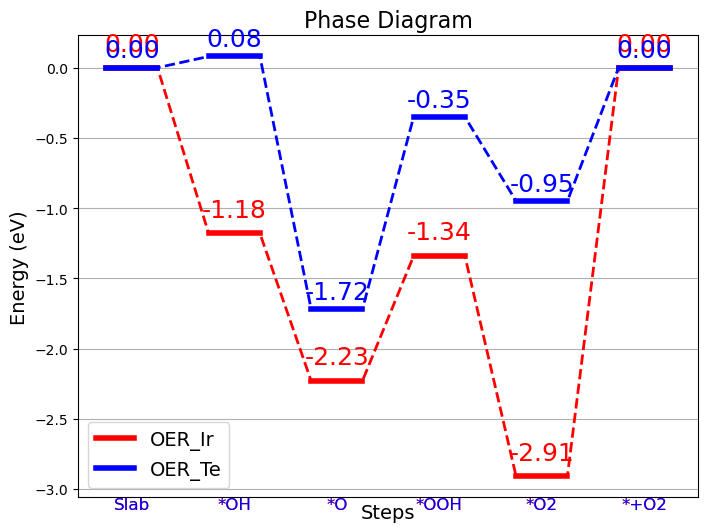

In [4]:
# 定义 HER_Ir 字典
HER_Ir = {'slab': 0, 'H': -0.38, 'H2': +0.38}
HER_Te = {'slab': 0, 'H': +0.51, 'H2': -0.51}

# 定义绘图函数
def plot_energy_diagram_HER():

    # 使用先前计算的能量值数据创建数据框架
    G1_Ir = 0 
    G2_Ir = G1_Ir + HER_Ir['H']
    G3_Ir = G2_Ir + HER_Ir['H2']
    data1 = [G1_Ir, G2_Ir, G3_Ir] 

    # 使用 HER_Te 计算能量
    G1_Te = 0 
    G2_Te = G1_Te + HER_Te['H']
    G3_Te = G2_Te + HER_Te['H2']
    data2 = [G1_Te, G2_Te, G3_Te] 

    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)  # 创建图形和子图

    # 设置颜色
    ax.set_prop_cycle(cycler('color', ['r', 'b']))  # 红色用于 HER_Ir，蓝色用于 HER_Te

    # 绘制 HER_Ir
    stepgraph_ins1 = StepsGraph(data=data1, legend_txt="HER_Ir", labels=["*","*H","*+H2"])
    stepgraph_ins1.plot_line_dot(ax=ax, color='r', energy_label=True, step_label=["Slab", "*H", "*+H2"])

    # 绘制 HER_Te
    stepgraph_ins2 = StepsGraph(data=data2, legend_txt="HER_Te", labels=["*","*H","*+H2"])
    stepgraph_ins2.plot_line_dot(ax=ax, color='b', energy_label=True, step_label=["Slab", "*H", "*+H2"])

    ax.legend(fontsize=14)
    plt.title("Phase Diagram", fontsize=16)
    plt.xlabel("Steps", fontsize=14)
    plt.ylabel("Energy (eV)", fontsize=14)  
    plt.grid(True)  
    plt.show()

OER_Ir = {'slab':0,'OH':-1.18,'O':-1.05,'OOH':+0.89,'*O2':-1.57,'*+O2':+2.91}
OER_Te = {'slab':0,'OH':+0.08,'O':-1.80,'OOH':+1.37,'*O2':-0.60,'*+O2':+0.95}

# 定义绘图函数
def plot_energy_diagram_OER():

    # 使用先前计算的能量值数据创建数据框架
    G1_Ir = 0 
    G2_Ir = G1_Ir + OER_Ir['OH']
    G3_Ir = G2_Ir + OER_Ir['O'] 
    G4_Ir = G3_Ir + OER_Ir['OOH'] 
    G5_Ir = G4_Ir + OER_Ir['*O2'] 
    G6_Ir = G5_Ir + OER_Ir['*+O2'] 

    data1 = [G1_Ir,G2_Ir,G3_Ir,G4_Ir,G5_Ir,G6_Ir]

    # 使用 HER_Te 计算能量
    G1_Te = 0 
    G2_Te = G1_Te  + OER_Te['OH'] 
    G3_Te  = G2_Te + OER_Te['O'] 
    G4_Te  = G3_Te + OER_Te['OOH'] 
    G5_Te = G4_Te  + OER_Te['*O2']
    G6_Te = G5_Te  + OER_Te['*+O2']

    data2 = [G1_Te,G2_Te,G3_Te,G4_Te,G5_Te,G6_Te]

    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)  # 创建图形和子图

    # 设置颜色
    ax.set_prop_cycle(cycler('color', ['r', 'b']))  # 红色用于 HER_Ir，蓝色用于 HER_Te

    # 绘制 OER_Ir
    stepgraph_ins1 = StepsGraph(data=data1, legend_txt="OER_Ir", labels=["*","*OH","*O",'*OOH',"*+O2"])
    stepgraph_ins1.plot_line_dot(ax=ax, color='r', energy_label=True, step_label=["Slab", "*OH", "*O","*OOH","*O2","*+O2"])

    # 绘制 OER_Te
    stepgraph_ins2 = StepsGraph(data=data2, legend_txt="OER_Te", labels=["*","*OH","*O",'*OOH',"*+O2"])
    stepgraph_ins2.plot_line_dot(ax=ax, color='b', energy_label=True, step_label=["Slab", "*OH", "*O","*OOH","*O2","*+O2"])

    ax.legend(fontsize=14)
    plt.title("Phase Diagram", fontsize=16)
    plt.xlabel("Steps", fontsize=14)
    plt.ylabel("Energy (eV)", fontsize=14)  
    plt.grid(True)  
    plt.show()




# 调用绘图函数
plot_energy_diagram_HER()
plot_energy_diagram_OER()
